# Compounds example

Download dataset:

In [ ]:
from griddify import datasets

data = datasets.get_compound_descriptors()

Preprocess data

In [2]:
from griddify import Preprocessing

pp = Preprocessing()
pp.fit(data)
data = pp.transform(data)

In [3]:
from griddify import FeatureDistances

fd = FeatureDistances(metric="cosine").calculate(data)

In [4]:
from griddify import Tabular2Cloud

tc = Tabular2Cloud()
tc.fit(fd)
Xc = tc.transform(fd)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
from griddify.plots import cloud_plot

<AxesSubplot:>

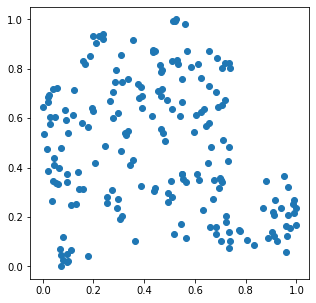

In [6]:
cloud_plot(Xc)

In [7]:
from griddify import Cloud2Grid

cg = Cloud2Grid(max_side=128)
cg.fit(Xc)
Xg = cg.transform(Xc, as_integers=False)

<AxesSubplot:>

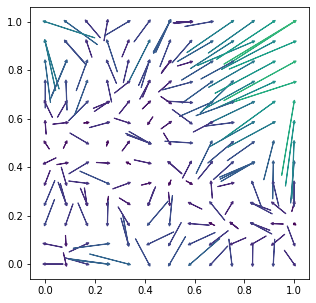

In [8]:
from griddify.plots import arrows_plot

arrows_plot(Xc, Xg, capping_distance=0.5)

In [9]:
from griddify import Cloud2Grid

cg = Cloud2Grid(max_side=128)
cg.fit(Xc)
mappings, side = cg.get_mappings(Xc)

In [10]:
from griddify import Flat2Grid

tg = Flat2Grid(mappings, side)
Xi = tg.transform(data)

100%|███████████████████████████████████| 10050/10050 [00:03<00:00, 2812.62it/s]


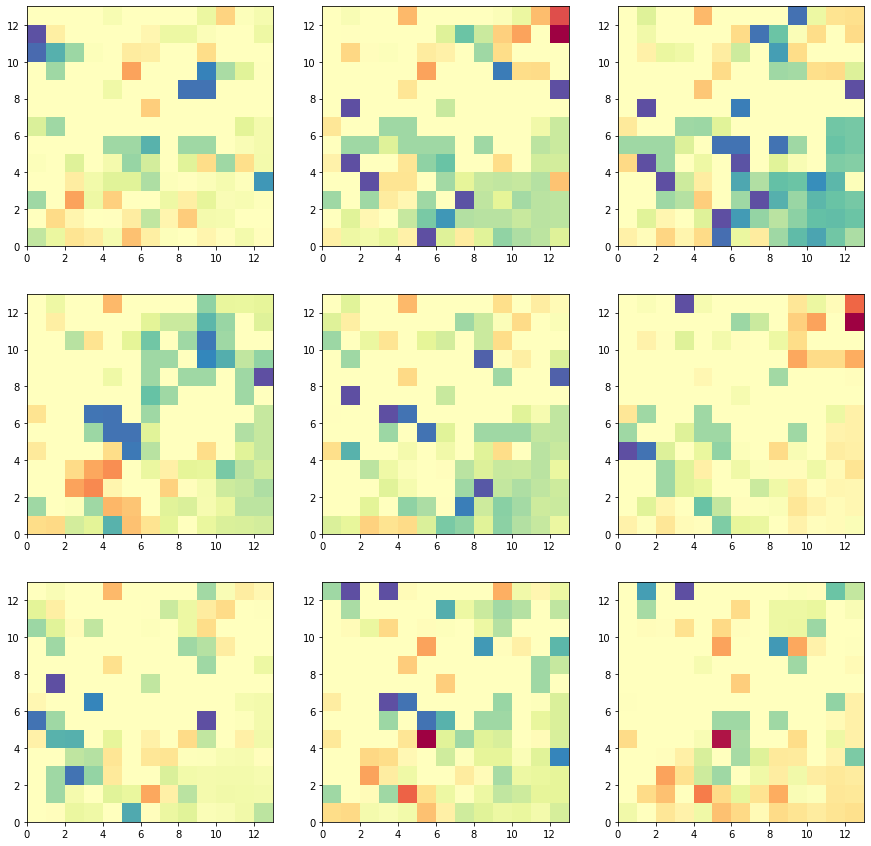

In [11]:
import matplotlib.pyplot as plt
from griddify.plots import grid_plot

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

for i in range(9):
    ax = axs[i]
    grid_plot(Xi[i], ax=ax, s=50)